In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rc('font', size=16)

In [3]:
ROLLOUT_RETURN_FILENAME = "rollout_return.csv"
SAC_RESULTS_DIR_1 = "../models/sac/HalfCheetah-v2/2022.05.10-18:13:40/SAC_online_20220510181343"
SAC_RESULTS_DIR_2 = "../models/sac/HalfCheetah-v2/2022.05.10-18:13:41/SAC_online_20220510181345"
SAC_RESULTS_DIR_3 = "../models/sac/HalfCheetah-v2/2022.05.10-18:13:42/SAC_online_20220510181344"

# SAC

In [4]:
sac_rollout_return_1 = pd.read_csv(os.path.join(SAC_RESULTS_DIR_1, ROLLOUT_RETURN_FILENAME), header=None, names='index step return'.split())
sac_rollout_return_2 = pd.read_csv(os.path.join(SAC_RESULTS_DIR_2, ROLLOUT_RETURN_FILENAME), header=None, names='index step return'.split())
sac_rollout_return_3 = pd.read_csv(os.path.join(SAC_RESULTS_DIR_3, ROLLOUT_RETURN_FILENAME), header=None, names='index step return'.split())

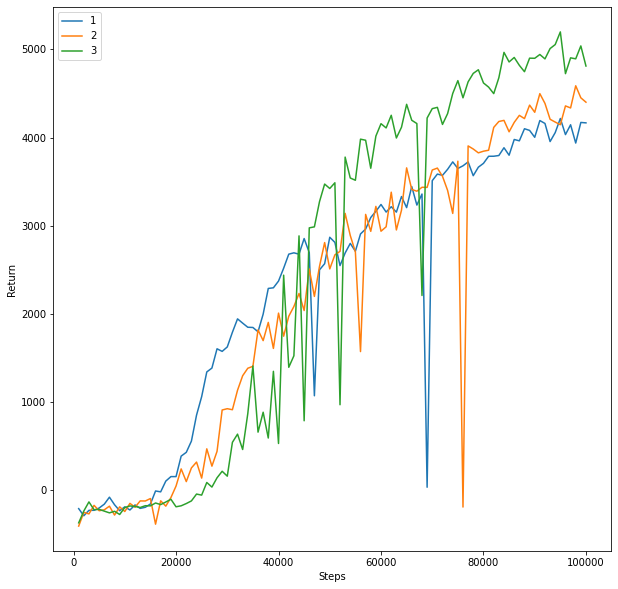

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(sac_rollout_return_1['step'], sac_rollout_return_1['return'], label='1')
ax.plot(sac_rollout_return_2['step'], sac_rollout_return_2['return'], label='2')
ax.plot(sac_rollout_return_3['step'], sac_rollout_return_3['return'], label='3')

ax.set_xlabel('Steps')
ax.set_ylabel('Return')
ax.legend()

# Environment Dynamics Model

In [15]:
OBS_ERROR_FILENAME = "obs_error.csv"
REW_ERROR_FILENAME = "rew_error.csv"

DYNAMICS_RESULTS_DIR_1 = "../models/dynamics/sac/HalfCheetah-v2/sac_2022.05.10-18:13:40/data_2022.05.11-11:17:04/2022.05.12-17:56:07/ProbabilisticEnsembleDynamics_20220512175607"

In [16]:
dynamics_obs_error_1 = pd.read_csv(os.path.join(DYNAMICS_RESULTS_DIR_1, OBS_ERROR_FILENAME), header=None, names='index step mean_ep_reward'.split())
dynamics_rew_error_1 = pd.read_csv(os.path.join(DYNAMICS_RESULTS_DIR_1, REW_ERROR_FILENAME), header=None, names='index step mean_ep_reward'.split())

In [17]:
dynamics_obs_error_1

,index,step,mean_ep_reward
0,1,10000,13.066355
1,2,20000,8.911330
2,3,30000,6.817471
3,4,40000,8.068268
4,5,50000,6.449725
5,6,60000,7.197529
6,7,70000,6.352160
7,8,80000,7.683426
8,9,90000,5.908873
9,10,100000,5.467896


In [18]:
dynamics_rew_error_1

,index,step,mean_ep_reward
0,1,10000,0.009587
1,2,20000,0.005069
2,3,30000,0.004777
3,4,40000,0.004258
4,5,50000,0.002783
5,6,60000,0.003260
6,7,70000,0.002706
7,8,80000,0.003225
8,9,90000,0.001960
9,10,100000,0.002056


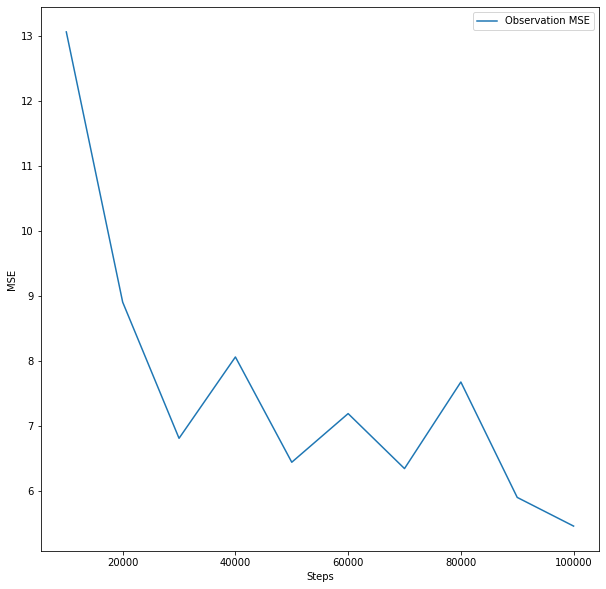

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(dynamics_obs_error_1['step'], dynamics_obs_error_1['mean_ep_reward'], label='Observation MSE')

ax.set_xlabel('Steps')
ax.set_ylabel('MSE')
ax.legend()

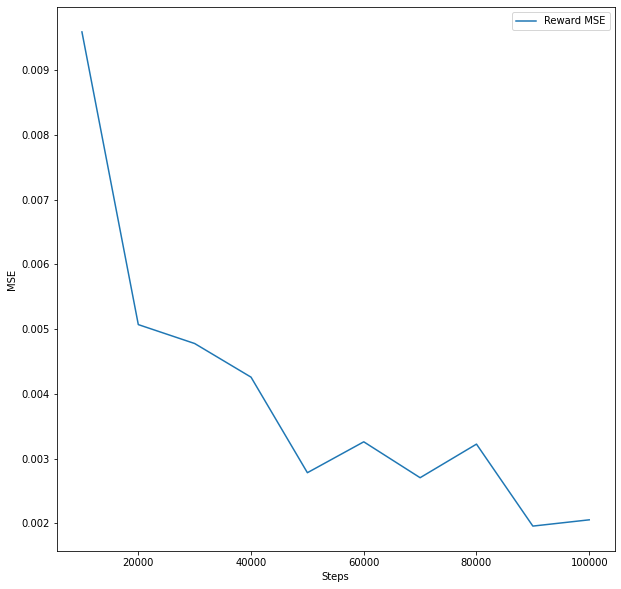

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(dynamics_rew_error_1['step'], dynamics_rew_error_1['mean_ep_reward'], label='Reward MSE')

ax.set_xlabel('Steps')
ax.set_ylabel('MSE')
ax.legend()

# MOPO

In [6]:
ENVIRONMENT_FILENAME = "environment.csv"
VALUE_SCALE_FILENAME = "value_scale.csv"

MOPO_RESULTS_DIR_1 = "../models/mopo/HalfCheetah-v2/sac_2022.05.10-18:13:40/dynamics_2022.05.12-17:56:07/data_2022.05.11-11:17:04/2022.05.14-12:36:43/MOPO_None_20220514123645"
MOPO_RESULTS_DIR_2 = "../models/mopo/HalfCheetah-v2/sac_2022.05.10-18:13:40/dynamics_2022.05.12-17:56:07/data_2022.05.11-11:17:04/2022.05.14-13:44:51/MOPO_None_20220514134455"

In [7]:
mopo_environment_1 = pd.read_csv(os.path.join(MOPO_RESULTS_DIR_1, ENVIRONMENT_FILENAME), header=None, names='index step mean_ep_reward'.split())
mopo_environment_2 = pd.read_csv(os.path.join(MOPO_RESULTS_DIR_2, ENVIRONMENT_FILENAME), header=None, names='index step mean_ep_reward'.split())

In [8]:
mopo_environment_1

,index,step,mean_ep_reward
0,1,1000,-2.830471
1,2,2000,-12.980099
2,3,3000,-23.280918
3,4,4000,-35.224595
4,5,5000,-75.950975
...,...,...,...
76,77,77000,779.497033
77,78,78000,606.461514
78,79,79000,261.550080
79,80,80000,467.322518


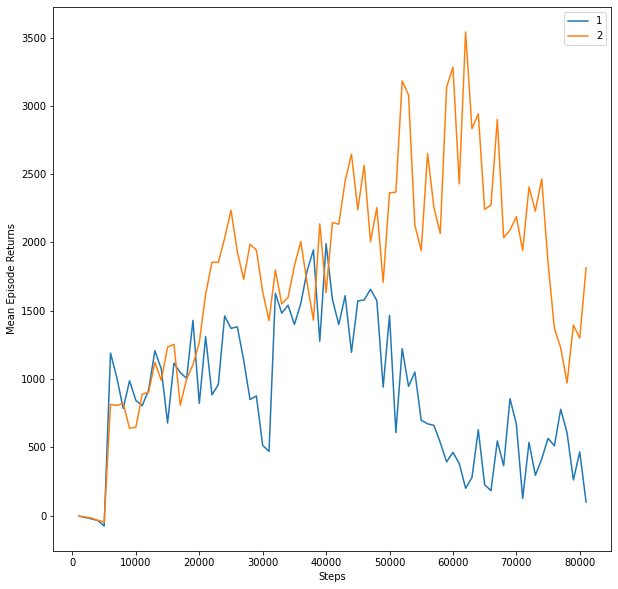

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(mopo_environment_1['step'], mopo_environment_1['mean_ep_reward'], label='1')
ax.plot(mopo_environment_2['step'], mopo_environment_2['mean_ep_reward'], label='2')

ax.set_xlabel('Steps')
ax.set_ylabel('Mean Episode Returns')
ax.legend()